# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/NLP/Assignment-05

/content/drive/MyDrive/NLP/Assignment-05


In [4]:
df = pd.read_csv('Tweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Check for Null Values

In [6]:
df.isnull().any()

,0
tweet_id,False
airline_sentiment,False
airline_sentiment_confidence,False
negativereason,True
negativereason_confidence,True
airline,False
airline_sentiment_gold,True
name,False
negativereason_gold,True
retweet_count,False


### We can see there are null values but actualythe only important columns are "airlane_sentiment" and "text" and these columns does not have null values, so we can proceed

# Change column names to label and text

In [7]:
reduced_df = df[['airline_sentiment', 'text']]

In [8]:
reduced_df.columns = ['labels', 'text']

In [9]:
reduced_df.head()

,labels,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Check if the data is balanced

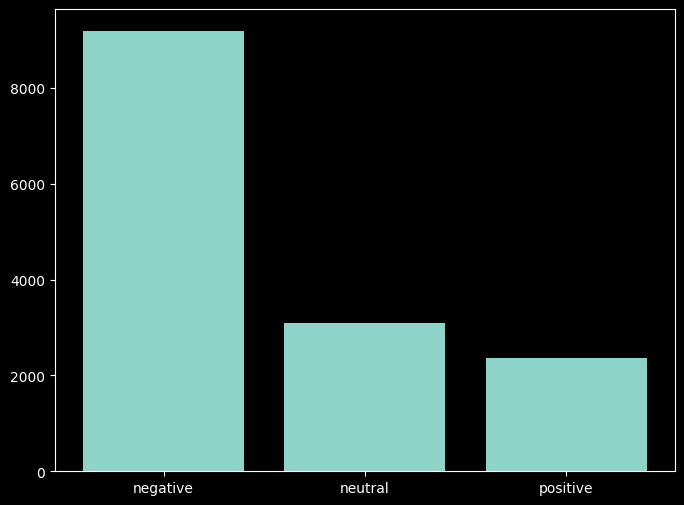

In [10]:
plt.figure(figsize = (8,6))
x, y = np.unique(reduced_df['labels'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

### The data is not balanced, most of the samples are "negative"

In [11]:
reduced_df['labels'].value_counts()

,count
labels,
negative,9178
neutral,3099
positive,2363


# Convert Labels into integers

In [12]:
reduced_df['labels'] = reduced_df['labels'].map({'negative': 0, 'neutral': 1, 'positive': 2})

<ipython-input-12-3dff9de454dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['labels'] = reduced_df['labels'].map({'negative': 0, 'neutral': 1, 'positive': 2})


In [13]:
reduced_df.head()

,labels,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


# Extract features and labels

In [14]:
features = reduced_df['text']
labels = reduced_df['labels']

# Perform train-test split

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Instantiate TFIDF Vectorizer and fit and tranform on training and testing data

In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

## Data must not be sparse matrix type before passing into tensorflow. Convert them to array.

In [17]:
X_train = X_train.toarray()
X_test = X_test.toarray()

# Check the dimensionality OR features in input data

In [18]:
D = X_train.shape[1]
print(D)

12987


# Create Neural Network Model

In [19]:
model = Sequential()
model.add(Dense(units = 256, input_shape =(D, ), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │       3,324,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,343,555 (12.75 MB)

 Trainable params: 3,343,555 (12.75 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [21]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [22]:
hist = model.fit(
  X_train, train_labels,
  validation_data=(X_test, test_labels),
  epochs = 125,
  batch_size = 64,
)

Epoch 1/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6186 - loss: 1.0119 - val_accuracy: 0.6452 - val_loss: 0.8971
Epoch 2/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6205 - loss: 0.9223 - val_accuracy: 0.6452 - val_loss: 0.8920
Epoch 3/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6201 - loss: 0.9194 - val_accuracy: 0.6452 - val_loss: 0.8903
Epoch 4/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6207 - loss: 0.9171 - val_accuracy: 0.6452 - val_loss: 0.8879
Epoch 5/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6248 - loss: 0.9117 - val_accuracy: 0.6452 - val_loss: 0.8853
Epoch 6/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6179 - loss: 0.9176 - val_accuracy: 0.6452 - val_loss: 0.8822
Epoch 7/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6198 - loss: 0.9104 - val_accuracy: 0.6452 - val_loss: 0.8789
Epoch 8/125
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6130 - loss: 0.9146 - val_acc

# Visualizing Model Performance

In [23]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

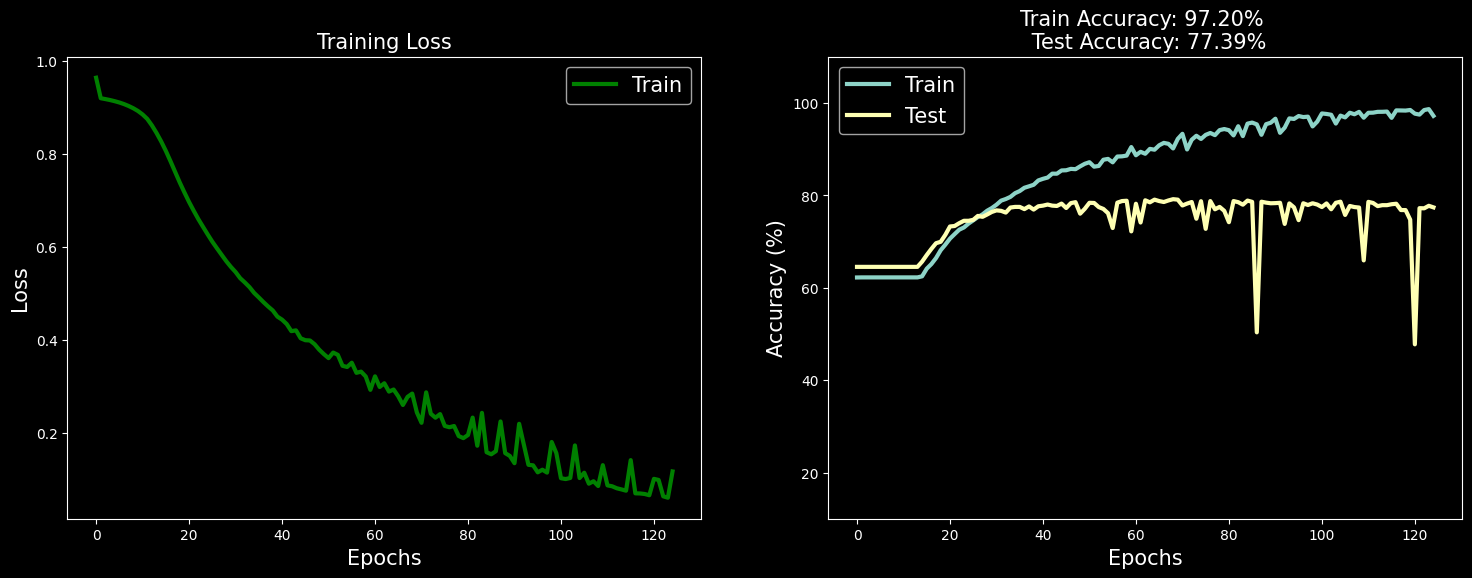

In [24]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

# Observe the Predicted Labels

In [25]:
y_pred = model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [26]:
y_pred.round(2)

array([[0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       ...,
       [0.45, 0.54, 0.01],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ]], dtype=float32)

In [27]:
pred_labels = np.argmax(y_pred, axis = 1)

In [28]:
pred_labels

array([2, 0, 0, ..., 1, 1, 0])

# Print the classification Report

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [30]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, pred_labels, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, pred_labels, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, pred_labels, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, pred_labels, average = 'macro')))

Accuracy : 0.77
Precision : 0.71
Recall : 0.71
F1_Score : 0.71


In [31]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1889
           1       0.55      0.59      0.57       580
           2       0.72      0.70      0.71       459

    accuracy                           0.77      2928
   macro avg       0.71      0.71      0.71      2928
weighted avg       0.78      0.77      0.78      2928



## Picking random tweets

In [32]:
from random import randint

row = randint(0,X_test.shape[0]-1)
random_tweet = reduced_df['text'][row]
print(random_tweet)

random_tweet_vectorized = vectorizer.transform([random_tweet])
random_tweet_vectorized = random_tweet_vectorized.toarray()

y_pred = model.predict(random_tweet_vectorized)
y_pred

@united we are sitting on the runway for 2 hours! It is ridiculous!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([[1.000000e+00, 2.162615e-08, 9.911692e-14]], dtype=float32)

# Support Vector Machine classifier

In [37]:
from sklearn.svm import SVC

svm_classifier = SVC()
X_vectorized = vectorizer.fit_transform(train_data)

svm_classifier.fit(X_vectorized, train_labels)

SVC()

In [38]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7906420765027322
